In [1]:
#! python3.6 data_wrangling.py

In [2]:
from readme_parser import rparser
rp = rparser()

Parsing Readme files


In [6]:
import pandas as pd

df = pd.read_csv('data/m14_merged.csv', index_col=0)

In [7]:
df.head()

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,age,height,weight,gender_ female,gender_ male,coffee_today_YES,sport_today_YES,smoker_NO,smoker_YES,feel_ill_today_YES
0,0.029937,0.009942,0.000000,0.087383,0.029510,0.011145,-0.024082,0.087383,0.000020,0.000008,...,27,175,80,0,1,0,0,1,0,0
1,0.021986,0.015845,0.000000,0.071558,0.017352,0.020817,-0.037843,0.071558,0.000012,0.000014,...,27,175,80,0,1,0,0,1,0,0
2,0.020839,0.011034,0.002752,0.054356,0.020839,0.011034,0.002752,0.054356,0.000014,0.000008,...,27,175,80,0,1,0,0,1,0,0
3,0.034449,0.003185,0.013761,0.040595,0.034449,0.003185,0.013761,0.040595,0.000024,0.000002,...,27,175,80,0,1,0,0,1,0,0
4,0.028870,0.004379,0.013761,0.038531,0.028870,0.004379,0.013761,0.038531,0.000020,0.000003,...,27,175,80,0,1,0,0,1,0,0


In [8]:
X = df.drop('label', axis=1).values
y = df['label'].values

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=10)  
X_train = lda.fit_transform(X_train, y_train)  
X_test = lda.transform(X_test)  

/home/mjohnson/wesad/wesad_venv/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [13]:
X_test.shape

(236, 2)

In [14]:
X_train.shape

(942, 2)

In [17]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=4, random_state=0)

classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

/home/mjohnson/wesad/wesad_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy' + str(accuracy_score(y_test, y_pred)))  

[[ 23  16   4]
 [ 10 114   2]
 [  1   7  59]]
Accuracy0.8305084745762712


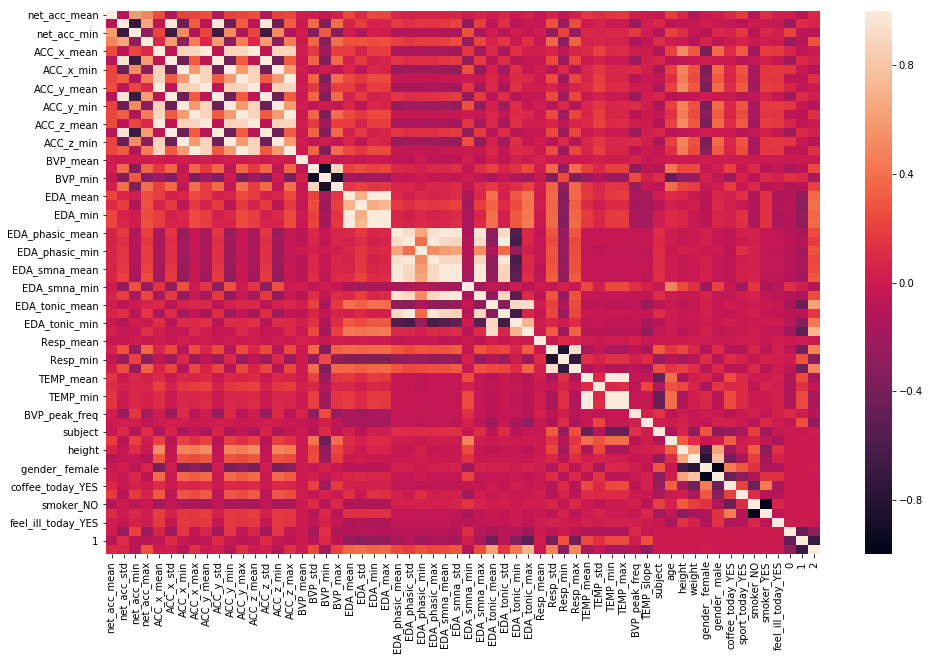

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

cdf = pd.concat([df.drop('label', axis=1), pd.get_dummies(df['label'])], axis=1)
corr = cdf.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr);

In [23]:
cdf.head()

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,gender_ female,gender_ male,coffee_today_YES,sport_today_YES,smoker_NO,smoker_YES,feel_ill_today_YES,0,1,2
0,0.029937,0.009942,0.000000,0.087383,0.029510,0.011145,-0.024082,0.087383,0.000020,0.000008,...,0,1,0,0,1,0,0,0,1,0
1,0.021986,0.015845,0.000000,0.071558,0.017352,0.020817,-0.037843,0.071558,0.000012,0.000014,...,0,1,0,0,1,0,0,0,1,0
2,0.020839,0.011034,0.002752,0.054356,0.020839,0.011034,0.002752,0.054356,0.000014,0.000008,...,0,1,0,0,1,0,0,0,1,0
3,0.034449,0.003185,0.013761,0.040595,0.034449,0.003185,0.013761,0.040595,0.000024,0.000002,...,0,1,0,0,1,0,0,0,1,0
4,0.028870,0.004379,0.013761,0.038531,0.028870,0.004379,0.013761,0.038531,0.000020,0.000003,...,0,1,0,0,1,0,0,0,1,0


In [25]:
df.columns

Index(['net_acc_mean', 'net_acc_std', 'net_acc_min', 'net_acc_max',
       'ACC_x_mean', 'ACC_x_std', 'ACC_x_min', 'ACC_x_max', 'ACC_y_mean',
       'ACC_y_std', 'ACC_y_min', 'ACC_y_max', 'ACC_z_mean', 'ACC_z_std',
       'ACC_z_min', 'ACC_z_max', 'BVP_mean', 'BVP_std', 'BVP_min', 'BVP_max',
       'EDA_mean', 'EDA_std', 'EDA_min', 'EDA_max', 'EDA_phasic_mean',
       'EDA_phasic_std', 'EDA_phasic_min', 'EDA_phasic_max', 'EDA_smna_mean',
       'EDA_smna_std', 'EDA_smna_min', 'EDA_smna_max', 'EDA_tonic_mean',
       'EDA_tonic_std', 'EDA_tonic_min', 'EDA_tonic_max', 'Resp_mean',
       'Resp_std', 'Resp_min', 'Resp_max', 'TEMP_mean', 'TEMP_std', 'TEMP_min',
       'TEMP_max', 'BVP_peak_freq', 'TEMP_slope', 'subject', 'label', 'age',
       'height', 'weight', 'gender_ female', 'gender_ male',
       'coffee_today_YES', 'sport_today_YES', 'smoker_NO', 'smoker_YES',
       'feel_ill_today_YES'],
      dtype='object')

In [26]:
feats =   ['BVP_mean', 'BVP_std', 'BVP_min', 'BVP_max',
           'EDA_phasic_mean', 'EDA_phasic_std', 'EDA_phasic_min', 'EDA_phasic_max', 'EDA_smna_mean',
           'EDA_smna_std', 'EDA_smna_min', 'EDA_smna_max', 'EDA_tonic_mean',
           'EDA_tonic_std', 'EDA_tonic_min', 'EDA_tonic_max', 'Resp_mean',
           'Resp_std', 'Resp_min', 'Resp_max', 'TEMP_mean', 'TEMP_std', 'TEMP_min',
           'TEMP_max', 'TEMP_slope', 'BVP_peak_freq', 'age', 'height',
           'weight','subject', 'label']

In [27]:
df2 = df[feats]#.head()

,BVP_mean,BVP_std,BVP_min,BVP_max,EDA_phasic_mean,EDA_phasic_std,EDA_phasic_min,EDA_phasic_max,EDA_smna_mean,EDA_smna_std,...,TEMP_std,TEMP_min,TEMP_max,TEMP_slope,BVP_peak_freq,age,height,weight,subject,label
0,-0.181673,107.648359,-358.13,554.77,1.824289,1.088328,0.367977,4.319987,1.284376,1.952823,...,0.012674,35.79,35.84,-0.000169,0.135670,27,175,80,2,1
1,-0.830147,118.742089,-392.28,438.16,2.109146,1.223528,0.539150,4.459367,1.467865,2.852510,...,0.029901,35.75,35.87,-0.000789,0.095023,27,175,80,2,1
2,0.939683,42.190039,-240.61,209.89,0.152828,0.128896,0.006950,0.544346,0.105091,0.244891,...,0.027612,35.66,35.75,-0.000717,0.076880,27,175,80,2,1
3,0.107404,41.606872,-289.26,145.36,0.177595,0.126167,0.002789,0.361388,0.110786,0.199704,...,0.019504,35.66,35.73,0.000075,0.140271,27,175,80,2,1
4,-0.073620,43.121633,-197.37,194.12,0.035014,0.039616,0.001144,0.132781,0.026716,0.114738,...,0.019386,35.71,35.79,0.000442,0.149321,27,175,80,2,1


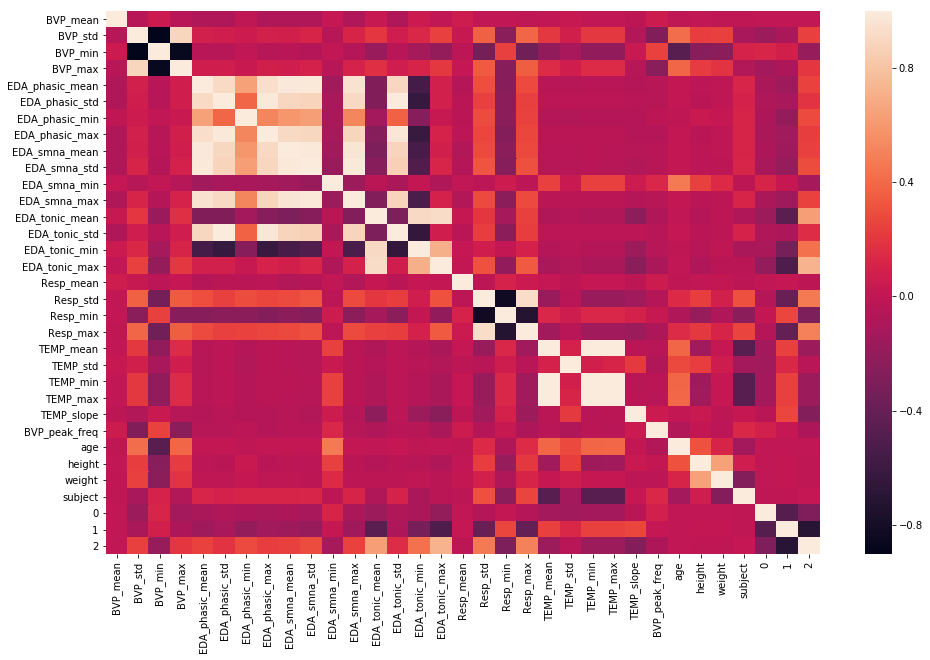

In [28]:

cdf = pd.concat([df[feats].drop('label', axis=1), pd.get_dummies(df[feats]['label'])], axis=1)
corr = cdf.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr);

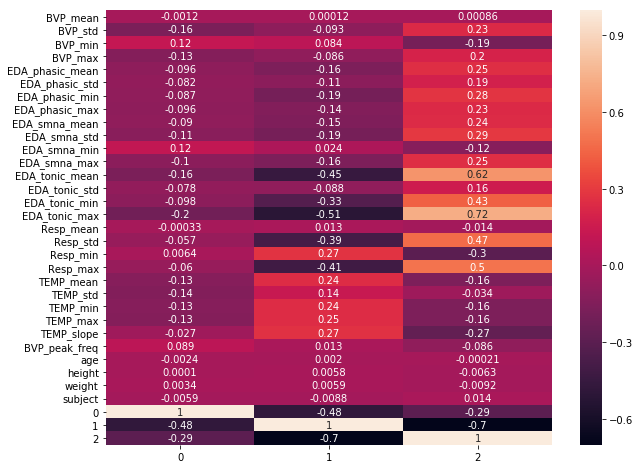

In [31]:
corr = cdf.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr[[0,1,2]], annot=True);